## MULTIPLE LOGISTIC REGRESSION

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import logit
from itertools import product
import numpy as np

Del dataset churn, ajusta un modelo de estado de abandono con las dos variables explicativas del conjunto de datos: la duración de la relación con el cliente y la antigüedad de la compra, y su interacción.

In [3]:
df_churn = pd.read_csv('churn.csv')
df_churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [4]:
modelo_churn = logit('has_churned~time_since_first_purchase*time_since_last_purchase',data = df_churn).fit()

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5


Para todas las combinaciones posibles de tiempo de relación con el cliente de -2 a 4 aumentando en tramos de 0.1 y antigüedad de compra de -1 a 6, en tramos de 0.1, predice si se darán de baja o no. (La predicción debe ser o 0 o 1)

In [10]:
data_predict_first= pd.DataFrame({'time_since_first_purchase': np.arange(-2,4,0.1)})
data_predict_last = pd.DataFrame({'time_since_last_purchase': np.arange(-1,6,0.1)})

data_predict_first['time_since_last_purchase']= 0
data_predict_last['time_since_first_purchase'] = 0

data_predict_first = data_predict_first.assign(has_churned=modelo_churn.predict(data_predict_first))
data_predict_last = data_predict_last.assign(has_churned=modelo_churn.predict(data_predict_last))

data_predict_first['has_churned'] = data_predict_first['has_churned'].apply(lambda x: 1 if x>0.5 else 0)
data_predict_last['has_churned'] = data_predict_last['has_churned'].apply(lambda x: 1 if x>0.5 else 0)

Muestra en un mismo gràfico los valores reales y nuestras perdicciones (el gráfico se ve que flipas). Responde la siguiente pregunta a ojo:
- Un usuario con antigüedad valor 3, cuanto debe hacer que no compra para que considere que se va a dar de baja?

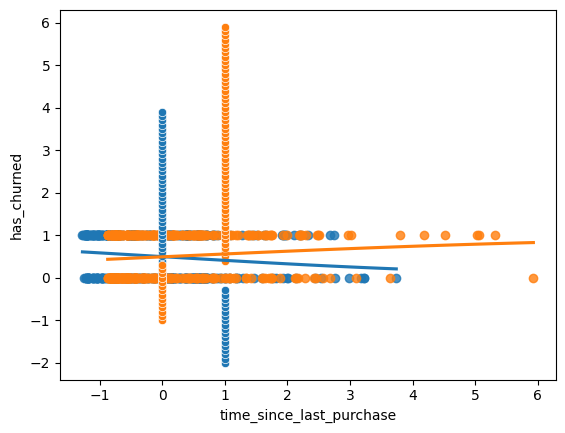

In [12]:
sns.regplot(x='time_since_first_purchase',y='has_churned',data=df_churn,logistic=True,ci=None)
sns.regplot(x='time_since_last_purchase',y='has_churned',data=df_churn,logistic=True,ci=None)
sns.scatterplot(y='time_since_first_purchase',x='has_churned',data=data_predict_first)
sns.scatterplot(y='time_since_last_purchase',x='has_churned',data=data_predict_last)
plt.show()

A través de la matriz de confusión, obtén la accuracy del modelo. ¿Te parece bueno?

## Sampling en python

Del DataSet Attrition, muestra la media de desgaste (attrition) para cada grupo de Sataisfacción en sus relaciones.
Posteriormente haz lo mismo para una muestra de 10,luego para una de 1000 y finalmente para el 25% (usa el parametro frac).
Saca tus conclusiones y escribe:

Queremos que siga la misma proporcion que el dataset original, así que obtén el 25% de muestras de cada grupo. Muestra los valores que se pedian antes y saca tus conlusiones:

Obtén el mismo número de muestras de cada grupo 50. Muestra los valores y reflexiona para cuando podría ser útil este tipo de muestreo: